---
#ML by Hand
---

## Import Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

## Read data

In [37]:
data = pd.read_csv('./ex1data1.txt', 
                   header=None, 
                   names=['population', 'profit']
              )
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


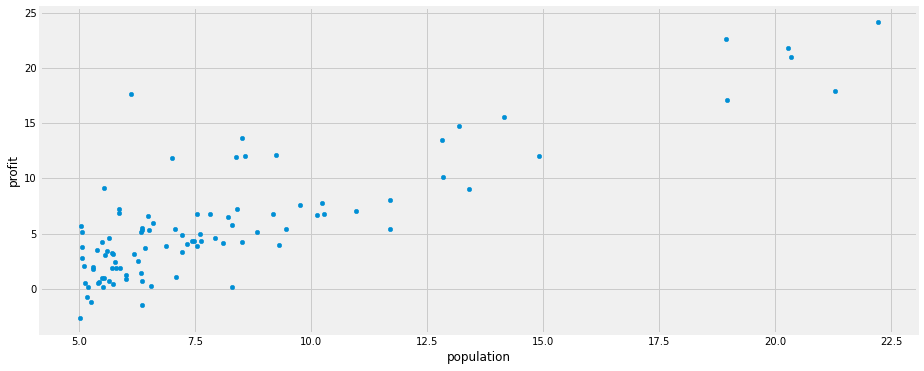

In [39]:
data.plot(
    kind='scatter',
    x='population',
    y='profit',
    # alpha=0.1,
    figsize=(14,6),
)

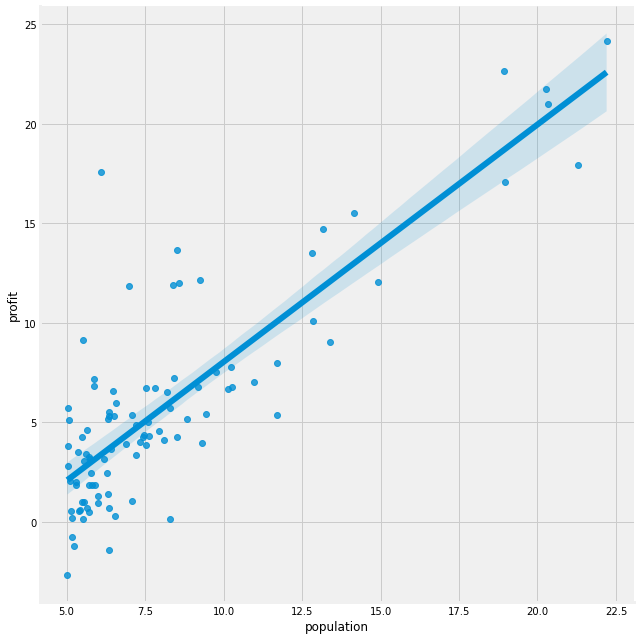

In [40]:
sns.lmplot(
    data=data,
    x='population',
    y='profit',
    height=9,
)

In [41]:
data.insert(
    loc=0,
    column='ones',
    value= 1
)

In [42]:
data

,ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


## Separate training and target values

In [43]:
# X = data[['ones', 'population']]
# y = data.profit 
cols = data.shape[1]
X = data.iloc[:, :cols-1]
y = data.iloc[:, cols-1:]

In [44]:
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [45]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


## Convert DF's to Matricies

In [46]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [47]:
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [48]:
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


Thetha Matrix

In [49]:
# np.random.seed(42)
# theta = np.matrix(np.random.random(size=2))
theta = np.matrix(np.array([0, 0]))
theta

matrix([[0, 0]])

In [50]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

## Cost Error Function J

In [56]:
def J(X, y, theta):
  z = np.power(((X * theta.T) - y), 2)
  return  np.sum(z) / (len(X) * 2)

In [57]:
J(X, y, theta)

32.072733877455676

## Gradient Descent

In [58]:
def gradient_descent(X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)

  for i in range(iters):
    error = (X * theta.T) - y

    for j in range(parameters):
      term = np.multiply(error, X[:, j])
      temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
    
    theta = temp
    cost[i] = J(X, y, theta)
  
  return theta, cost


In [63]:
alpha = .01
iters = 1000  # 4.515955503078914
# iters = 10000  # 4.476971375975179
# iters = 100000   # 4.476971375975179
g, cost = gradient_descent(X, y, theta, alpha, iters)

print(f'g = {g }')
print(f'cost = {cost[:5]}')
print(f'compute cost: {J(X,y, g)}')

g = [[-3.24140214  1.1272942 ]]
cost = [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494]
compute cost: 4.515955503078914


## Get the best fit line

In [64]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + g[0, 1] * x

## Draw Line

Text(0.5, 1.0, 'Predicted Profit vs Population Size')

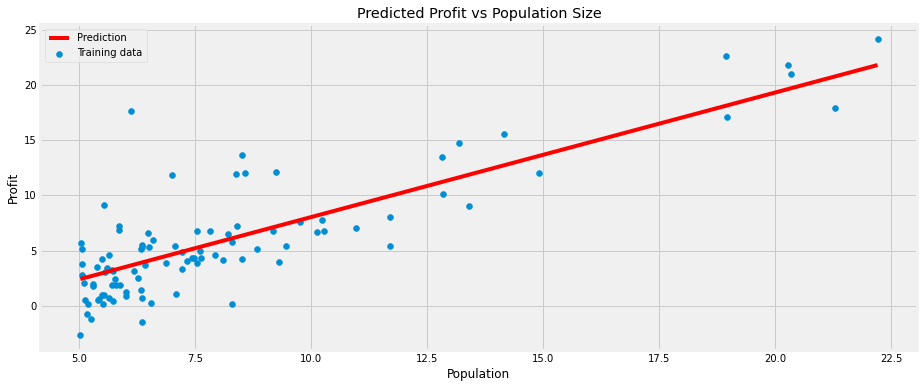

In [65]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population Size')

## Error Graph

Text(0.5, 1.0, 'Error vs training epoch')

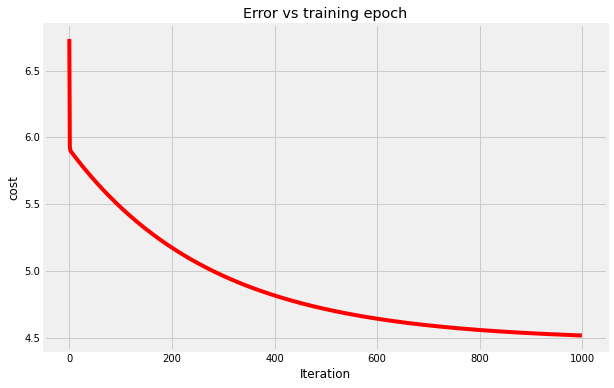

In [67]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('cost')
ax.set_title('Error vs training epoch')